## 文本关键字提取

** 关键词抽取从方法来说主要有两种：**
* 第一种是关键词分配：就是给定一个已有的关键词库，对于新来的文档从该词库里面匹配几个词语作为这篇文档的关键词。
* 第二种是关键词提取：针对新文档，通过算法分析，提取文档中一些词语作为该文档的关键词。

## 基于 TF-IDF 算法进行关键词提取
> 在信息检索理论中，TF-IDF 是 Term Frequency - Inverse Document Frequency 的简写。TF-IDF 是一种数值统计，用于反映一个词对于语料中某篇文档的重要性。在信息检索和文本挖掘领域，它经常用于因子加权。TF-IDF 的主要思想就是：如果某个词在一篇文档中出现的频率高，也即 TF 高；并且在语料库中其他文档中很少出现，即 DF 低，也即 IDF 高，则认为这个词具有很好的类别区分能力。

** TF 为词频（Term Frequency），表示词 t 在文档 d 中出现的频率，计算公式：**

> 其中，`ni，j`是该词`ti`在文件`dj`中的出现次数，而分母则是在文件`dj`中所有字词的出现次数之和。

** IDF 为逆文档频率（Inverse Document Frequency），表示语料库中包含词 t 的文档的数目的倒数，计算公式：**

> 其中，`|D|` 表示语料库中的文件总数，`|{j:ti∈dj}|`包含词ti的文件数目，如果该词语不在语料库中，就会导致被除数为零，因此一般情况下使用`1+|{j:ti∈dj}|`。

** TF-IDF 在实际中主要是将二者相乘，也即 TF * IDF， 计算公式：**

> 因此，TF-IDF 倾向于过滤掉常见的词语，保留重要的词语。例如，某一特定文件内的高频率词语，以及该词语在整个文件集合中的低文件频率，可以产生出高权重的 TF-IDF。

## 好在 jieba 已经实现了基于 TF-IDF 算法的关键词抽取，通过命令 import jieba.analyse 引入，函数参数解释如下：

```
import jieba.analyse
jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
```

* sentence：待提取的文本语料；

* topK：返回 TF/IDF 权重最大的关键词个数，默认值为 20；

* withWeight：是否需要返回关键词权重值，默认值为 False；

* allowPOS：仅包括指定词性的词，默认值为空，即不筛选。

In [5]:
# 示例：
import jieba.analyse

sentence = '人工智能（Artificial Intelligence），英文缩写为AI。它是研究、开发用于模拟、延伸和扩展人的智能的理论、方法、技术及应用系统的一门新的技术科学。人工智能是计算机科学的一个分支，它企图了解智能的实质，并生产出一种新的能以人类智能相似的方式做出反应的智能机器，该领域的研究包括机器人、语言识别、图像识别、自然语言处理和专家系统等。人工智能从诞生以来，理论和技术日益成熟，应用领域也不断扩大，可以设想，未来人工智能带来的科技产品，将会是人类智慧的“容器”。人工智能可以对人的意识、思维的信息过程的模拟。人工智能不是人的智能，但能像人那样思考、也可能超过人的智能。人工智能是一门极富挑战性的科学，从事这项工作的人必须懂得计算机知识，心理学和哲学。人工智能是包括十分广泛的科学，它由不同的领域组成，如机器学习，计算机视觉等等，总的说来，人工智能研究的一个主要目标是使机器能够胜任一些通常需要人类智能才能完成的复杂工作。但不同的时代、不同的人对这种“复杂工作”的理解是不同的。2017年12月，人工智能入选“2017年度中国媒体十大流行语”。'
keywords = '  '.join(jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=()))
print(sentence)
print('\n\n' + keywords)

人工智能（Artificial Intelligence），英文缩写为AI。它是研究、开发用于模拟、延伸和扩展人的智能的理论、方法、技术及应用系统的一门新的技术科学。人工智能是计算机科学的一个分支，它企图了解智能的实质，并生产出一种新的能以人类智能相似的方式做出反应的智能机器，该领域的研究包括机器人、语言识别、图像识别、自然语言处理和专家系统等。人工智能从诞生以来，理论和技术日益成熟，应用领域也不断扩大，可以设想，未来人工智能带来的科技产品，将会是人类智慧的“容器”。人工智能可以对人的意识、思维的信息过程的模拟。人工智能不是人的智能，但能像人那样思考、也可能超过人的智能。人工智能是一门极富挑战性的科学，从事这项工作的人必须懂得计算机知识，心理学和哲学。人工智能是包括十分广泛的科学，它由不同的领域组成，如机器学习，计算机视觉等等，总的说来，人工智能研究的一个主要目标是使机器能够胜任一些通常需要人类智能才能完成的复杂工作。但不同的时代、不同的人对这种“复杂工作”的理解是不同的。2017年12月，人工智能入选“2017年度中国媒体十大流行语”。


人工智能  智能  2017  机器  不同  人类  科学  模拟  一门  技术  计算机  研究  工作  Artificial  Intelligence  AI  图像识别  12  复杂  流行语


In [9]:
keywords = (jieba.analyse.extract_tags(sentence, topK=10, withWeight=True, allowPOS=(['n', 'v'])))
print(keywords)

[('人工智能', 0.9750542675762887), ('智能', 0.5167124540885567), ('机器', 0.20540911929525774), ('人类', 0.17414426566082475), ('科学', 0.17250169374402063), ('模拟', 0.15723537382948452), ('技术', 0.14596259315164947), ('计算机', 0.14030483362639176), ('图像识别', 0.12324502580309278), ('流行语', 0.11242211730309279)]


## 基于 TextRank 算法进行关键词提取

> TextRank 是由 PageRank 改进而来，核心思想将文本中的词看作图中的节点，通过边相互连接，不同的节点会有不同的权重，权重高的节点可以作为关键词。这里给出 TextRank 的公式：


** TextRank 用于关键词提取的算法如下：**

* 把给定的文本 T 按照完整句子进行分割，即:



* 对于每个句子，进行分词和词性标注处理，并过滤掉停用词，只保留指定词性的单词，如名词、动词、形容词，其中ti,j
 是保留后的候选关键词。



* 构建候选关键词图 G = (V,E)，其中 V 为节点集，由（2）生成的候选关键词组成，然后采用共现关系（Co-Occurrence）构造任两点之间的边，两个节点之间存在边仅当它们对应的词汇在长度为 K 的窗口中共现，K 表示窗口大小，即最多共现 K 个单词。
* 根据 TextRank 的公式，迭代传播各节点的权重，直至收敛。
* 对节点权重进行倒序排序，从而得到最重要的 T 个单词，作为候选关键词。
* 由（5）得到最重要的 T 个单词，在原始文本中进行标记，若形成相邻词组，则组合成多词关键词。


In [14]:
# 在jieba中使用textrank
text_rank = jieba.analyse.textrank(sentence, topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))

In [15]:
# 连接
'  '.join(text_rank)

'智能  人工智能  机器  人类  研究  技术  模拟  包括  科学  工作  领域  理论  计算机  年度  需要  语言  相似  方式  做出  心理学'

In [2]:
# 项目实例
import os
import jieba
import gensim

import numpy as np
import pandas as pd
import jieba.analyse as jba
import matplotlib.pyplot as plt

from gensim import corpora, models, similarities
from matplotlib.font_manager import FontProperties

%matplotlib inline

base_dir = os.getcwd()
car_csv = os.path.join(base_dir, 'car.csv')
stop_words = os.path.join(base_dir, 'stopwords.txt')

# 设置中文字体
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)

# 定义停用词
stopwords = pd.read_csv(stop_words, index_col=False, quoting=3, sep='\t', names=['stopword'], encoding='utf-8')
stopwords = stopwords['stopword'].values

# 加载预料库
df = pd.read_csv(car_csv, encoding='utf-8')
# 删除空（na）行
df.dropna(inplace=True)

lines = df.content.values.tolist()

# 开始分词
sentences = []

for line in lines:
    try:
        segs = jieba.lcut(line)
        segs = [v for v in segs if not str(v).isdigit()] # 去除数字
        segs = list(filter(lambda x: x.strip(), segs))   # 去左右空格
        segs = list(filter(lambda x: x not in stopwords, segs))
        sentences.append(segs)
    except Exception:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ns/m8xd7fv97296z3d_wx3qfbtw0000gn/T/jieba.cache
Loading model cost 0.829 seconds.
Prefix dict has been built succesfully.


In [3]:
# 构建词袋模式
dictionary = corpora.Dictionary(sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in sentences]

# lda 模型
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)
# 检查第一个分类，最常出现的5个单词
print(lda.print_topic(1, topn=5))
# 打印前5个主题，每个主题显示8个字符
for topic in lda.print_topics(num_topics=10, num_words=8):
    print(topic)

0.012*"车辆" + 0.009*"电动车" + 0.009*"华晨" + 0.007*"宝骏" + 0.007*"工厂"
(0, '0.015*"品牌" + 0.014*"汽车" + 0.011*"辆" + 0.011*"4S店" + 0.009*"召回" + 0.008*"销售" + 0.007*"中国" + 0.007*"中"')
(1, '0.012*"车辆" + 0.009*"电动车" + 0.009*"华晨" + 0.007*"宝骏" + 0.007*"工厂" + 0.006*"产能" + 0.006*"召回" + 0.006*"排放"')
(2, '0.029*"SUV" + 0.017*"车型" + 0.017*"全新" + 0.011*"别克" + 0.010*"上市" + 0.009*"轿车" + 0.009*"越野" + 0.008*"品牌"')
(3, '0.049*"汽车" + 0.023*"中国" + 0.014*"市场" + 0.014*"新能源" + 0.012*"发展" + 0.012*"品牌" + 0.010*"万辆" + 0.010*"产品"')
(4, '0.014*"动力" + 0.014*"车型" + 0.011*"发动机" + 0.010*"汽车" + 0.009*"技术" + 0.009*"充电" + 0.008*"万元" + 0.008*"新能源"')
(5, '0.020*"车辆" + 0.017*"驾驶" + 0.013*"汽车" + 0.008*"自动" + 0.008*"中" + 0.007*"司机" + 0.006*"信息" + 0.006*"停车"')
(6, '0.018*"汽车" + 0.016*"服务" + 0.009*"提供" + 0.009*"用户" + 0.009*"市场" + 0.009*"奥迪" + 0.007*"出行" + 0.007*"经销商"')
(7, '0.035*"二手车" + 0.010*"瓜子" + 0.009*"车辆" + 0.007*"网约车" + 0.006*"车" + 0.006*"市场" + 0.005*"司机" + 0.005*"政策"')
(8, '0.022*"智能" + 0.021*"系统" + 0.016*"设计" + 0.013*"体验" + 0.

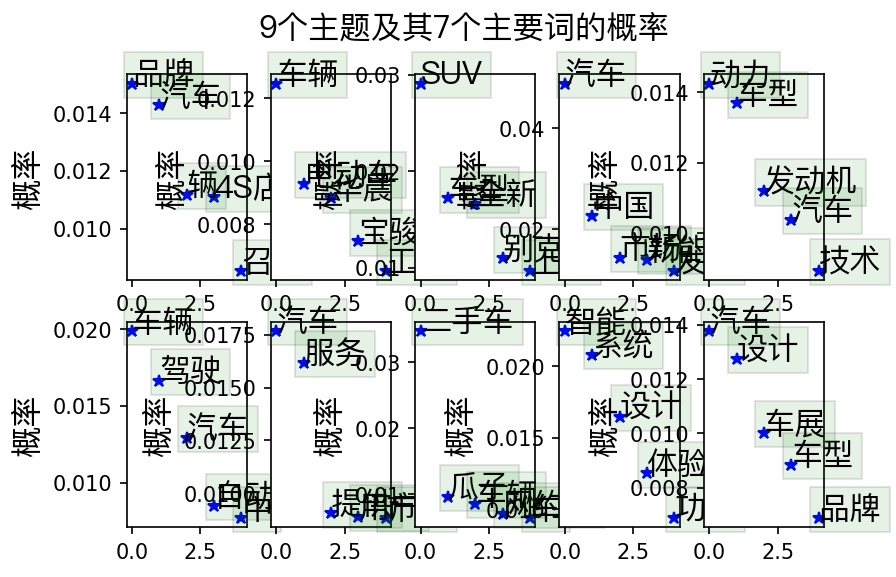

In [7]:
# 将数据显示成图形
plt.rcParams['font.sans-serif'] = [u'PingFang']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.unicode_minus'] = False
# 在可视化部分，我们首先画出了九个主题的7个词的概率分布图
num_show_term = 5
num_topics = 10

for i, k in enumerate(range(num_topics)):
    ax = plt.subplot(2, 5, i + 1)
    item_dis_all = lda.get_topic_terms(topicid=k)
    item_dis = np.array(item_dis_all[:num_show_term])
    ax.plot(range(num_show_term), item_dis[:, 1], 'b*')
    item_word_id = item_dis[:, 0].astype(np.int)
    word = [dictionary.id2token[i] for i in item_word_id]
    ax.set_ylabel(u'概率', fontproperties=getChineseFont())
    
    for j in range(num_show_term):
        ax.text(j, item_dis[j, 1], word[j], bbox=dict(facecolor='green',alpha=0.1), fontproperties=getChineseFont())

plt.suptitle(u'9个主题及其7个主要词的概率', fontsize=18, fontproperties=getChineseFont())
plt.show()